In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [0]:
# diffusion rate of A
#dA = 2.8e-4
dA = 2.8e-2
# diffusion rate of B
#dB = 5e-3
dB = 5e-5
# kill rate
#k = -.005
k = .062
# feed rate
f = .055

# the Karl Sims numbers: DA=1.0, DB=.5, f=.055, k=.062

In [0]:
T = 25.0  # total time
dt = .001  # time step
n = int(T / dt)  # number of iterations

In [0]:
size = 100  # size of the 2D grid
dx = 2. / size  # space step

In [0]:
# laplacian function --> this current version is not a 3x3 convolution, I don't think --> that will be next step
# this function returns a matrix that contains the laplacian of each cell . . . I don't fully understand how the math checks out though
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2] # indexing to -2 gets you the second-to-last character
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

In [0]:
# display the grid
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

In [0]:
# initializing the two "chemicals" randomly
A = np.random.rand(size, size)
B = np.random.rand(size, size)

In [0]:
# initializing the two chemicals in the Karl Simms way
A = np.ones((size, size))
B = np.zeros((size, size))
for i in range(10):
  x,y = random.randint(1,size-1), random.randint(1,size-1)
  B[x,y] = 1
  A[x,y] = 0

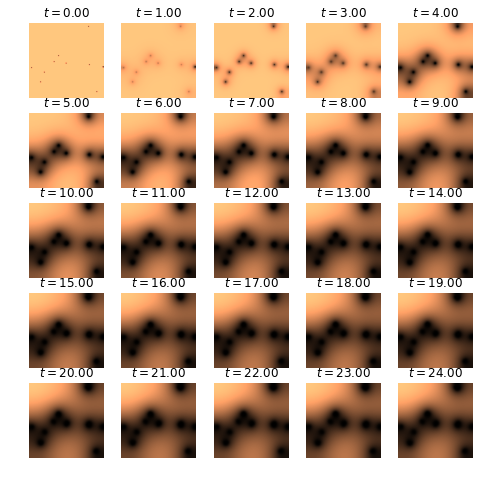

In [69]:

#for github version
tau = 0.1

fig, axes = plt.subplots(5, 5, figsize=(8, 8))
step_plot = n // 25

# What is the finite difference method for simulating PDEs?
# gives an explanation of how to use finite difference method, but does not give theory behind how it works: https://www.youtube.com/watch?v=bLiaz-IHX_Y&t=634s

# for each time step
for i in range(n):
  # calculate the laplacian for that square
  A_laplac = laplacian(A)
  B_laplac = laplacian(B)
  # store previous values of A and B in that square
  A_prev = A[1:-1, 1:-1]
  B_prev = B[1:-1, 1:-1]
  
  # update values of A and B using the mysterious github equation
  #A[1:-1, 1:-1], B[1:-1, 1:-1] = \
        #A_prev + dt * (dA * A_laplac + A_prev - A_prev**3 - B_prev + k),\
        #B_prev + dt * (dB * B_laplac + A_prev - B_prev) / tau
  
  # update the values of A and B using the Karl Simms equation
  A[1:-1, 1:-1] = A_prev + (dA*A_laplac - A_prev*B_prev**2 + f*(1-A_prev))*dt
  B[1:-1, 1:-1] = B_prev + (dB*B_laplac + A_prev*B_prev**2 - (k+f)*B_prev)*dt
  
  # not adhering to Neumann conditions (derivatives at the edges are not null) --> this seems to cause everything to disperse to the edges
  # does it disperse to the edges because the derivatives are essentially infinite at those edges? 
  
  # set edges to zero --> this makes everything disappear --> actually everything disappeared because the dispersion rates were too high
  #A[0, :] = 0
  #A[:, 0] = 0
  #A[-1, :] = 0
  #A[:, -1] = 0
  #B[0, :] = 0
  #B[:, 0] = 0
  #B[-1, :] = 0
  #B[:, -1] = 0
  
  # set edge derivatives to null --> WHAT IS THE DIFFERENCE BETWEEN NULL AND ZERO?
  for Z in (A, B):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]
  
  
  # at certain intervals visualize the grid
  # We plot the state of the system at
  # 9 different times.
  if i % step_plot == 0 and i < 25 * step_plot:
      ax = axes.flat[i // step_plot]
      show_patterns(A, ax=ax)
      ax.set_title(f'$t={i * dt:.2f}$')

In [0]:
# THE KARL-SIMS WAY --> I think the code above is basically a vectorized version of this
# laplacian function needs to become a 3x3 convolution
# for each time step
  # for each square in grid
    # calculate the laplacian of that square (I think it's a discreet laplacian but not really sure?) 
    # store previous A and B values of that square
    # update A and B values of that square
  # at certain time points, visualize the grid